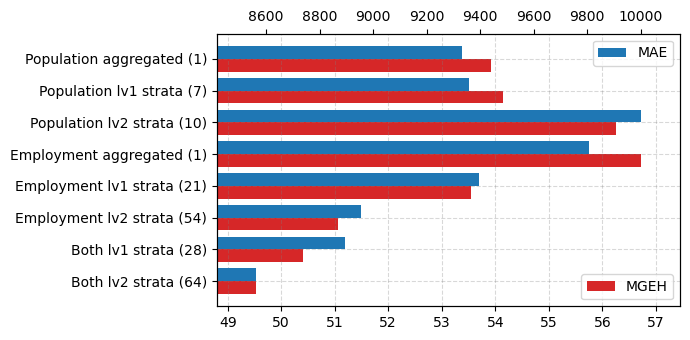

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'validation_results-feature_importance.csv'
data = pd.read_csv(file_path, usecols=[0, 1, 2])

# Filter rows that do not start with 'no'
filtered_data = data[~data['log_name'].str.startswith('no')]

# Extract necessary columns for plotting
labels = filtered_data['log_name']
geh_values = filtered_data['min_valid_geh']
mae_values = filtered_data['min_valid_mae']

# Define custom colors
geh_color = (214/255, 39/255, 40/255)  # RGB for GEH
mae_color = (31/255, 119/255, 180/255)  # RGB for MAE

# Plot the horizontal bar plot with two x-axes
fig, ax1 = plt.subplots(figsize=(7, 3.5))

# Bar heights
bar_height = 0.4
positions = range(len(labels))

# Plotting GEH on the first x-axis
ax1.barh([p - bar_height/2 for p in positions], geh_values, height=bar_height, color=geh_color, label='MGEH')
ax1.set_yticks(positions)
ax1.set_yticklabels(labels)

# Adjust xlim for GEH
geh_buffer = (max(geh_values) - min(geh_values)) * 0.1  # 10% buffer
ax1.set_xlim(min(geh_values) - geh_buffer, max(geh_values) + geh_buffer)

# Add grey dotted grid lines for the first axis (GEH)
ax1.grid(axis='both', linestyle='--', color='grey', alpha=0.3)

# Create a second x-axis for MAE
ax2 = ax1.twiny()
ax2.barh([p + bar_height/2 for p in positions], mae_values, height=bar_height, color=mae_color, label='MAE')

# Adjust xlim for MAE
mae_buffer = (max(mae_values) - min(mae_values)) * 0.1  # 10% buffer
ax2.set_xlim(min(mae_values) - mae_buffer, max(mae_values) + mae_buffer)

# Add legends
ax1.legend(['MGEH'], loc='lower right')
ax2.legend(['MAE'], loc='upper right')

# Layout adjustment
plt.tight_layout()

# Show plot
plt.savefig('feature_importance.png')
plt.show()